--- Dataset Loaded ---
   Hours_Driving (x)  Risk_Score (y)
0                 10              95
1                  9              80
2                  2              10
3                 15              50
4                 10              45
5                 16              98
6                 11              38
7                 16              93
----------------------------------------
--- Data Split (Random State: 42) ---
Training Samples: 6 (75%)
Testing Samples: 2 (25%)
----------------------------------------
--- Model Parameters ---
Slope (b1): 4.4216
Intercept (b0): 8.0027
Regression Equation: ŷ = 8.0027 + 4.4216x
----------------------------------------
--- Model Evaluation (on Test Set) ---
Root Mean Squared Error (RMSE): 26.5295
Accuracy (R-squared): -7.6891 (-768.91%)
----------------------------------------
--- Prediction for X = 6 Hours ---
Predicted Risk Score (y): 34.532
----------------------------------------


C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


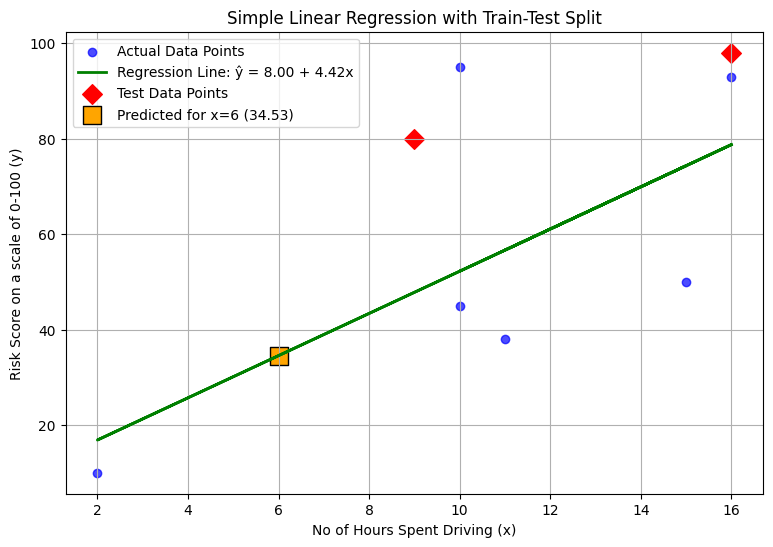

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# --- 1. Load the Dataset ---
# The data is taken from the problem definition in the document[cite: 11].
# Independent variable (X): 'No of Hours Spent Driving'
# Dependent variable (y): 'Risk Score on a scale of 0-100'
data = {
    'Hours_Driving (x)': [10, 9, 2, 15, 10, 16, 11, 16],
    'Risk_Score (y)': [95, 80, 10, 50, 45, 98, 38, 93]
}
df = pd.DataFrame(data)
print("--- Dataset Loaded ---")
print(df)
print("-" * 40)

# Prepare data for scikit-learn
# X (Independent variable) must be a 2D array/DataFrame.
# y (Dependent variable) is a 1D Series/array.
X = df[['Hours_Driving (x)']]
y = df['Risk_Score (y)']

# --- 2. Split Data into Training and Testing Sets ---
# We use train_test_split to divide the data.
# test_size=0.25 means 25% of the data (2 rows) will be used for testing.
# random_state=42 ensures the split is the same every time the code runs.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"--- Data Split (Random State: 42) ---")
print(f"Training Samples: {len(X_train)} (75%)")
print(f"Testing Samples: {len(X_test)} (25%)")
print("-" * 40)


# --- 3. Initialize and Train the Linear Regression Model ---
# LinearRegression() creates the model object.
regressor = LinearRegression()

# regressor.fit() trains the model using the training data (X_train, y_train).
# This process finds the optimal slope (b1) and intercept (b0) that minimize the sum of squared errors.
regressor.fit(X_train, y_train)

# --- 4. Retrieve Model Parameters (Slope and Intercept) ---
b1 = regressor.coef_[0]    # The slope (coefficient) of the regression line.
b0 = regressor.intercept_  # The y-intercept of the regression line.

print(f"--- Model Parameters ---")
print(f"Slope (b1): {b1:.4f}")
print(f"Intercept (b0): {b0:.4f}")
print(f"Regression Equation: ŷ = {b0:.4f} + {b1:.4f}x")
print("-" * 40)


# --- 5. Evaluate the Model Performance ---

# a) Prediction on the Test Set
# We use the trained model to predict 'y' values for the unseen 'X_test' data.
y_test_pred = regressor.predict(X_test)

# b) Root Mean Squared Error (RMSE) on Test Set
# RMSE measures the average magnitude of the errors (the difference between predicted and actual values).
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# c) Accuracy (R-squared or Coefficient of Determination) on Test Set
# R-squared (r2_score) represents the proportion of the variance for the dependent variable (y)
# that is predictable from the independent variable (X). A value closer to 1 is better.
r_squared = r2_score(y_test, y_test_pred)

print(f"--- Model Evaluation (on Test Set) ---")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
# NOTE: R2 score on a small, randomly split dataset can vary widely.
print(f"Accuracy (R-squared): {r_squared:.4f} ({r_squared * 100:.2f}%)")
print("-" * 40)


# --- 6. Make a Specific Prediction ---
# We use the example from the document: Predict Risk Score for 6 hours driving.
input_x = 6
# The input for predict must be in the same 2D format as X (e.g., [[6]]).
predicted_y = regressor.predict(np.array([[input_x]]))

print(f"--- Prediction for X = {input_x} Hours ---")
print(f"Predicted Risk Score (y): {predicted_y[0]:.3f}")
print("-" * 40)


# --- 7. Plotting the Results ---

# Set up the plot area
plt.figure(figsize=(9, 6))

# Plot the actual data points (Scatter Plot)
plt.scatter(X, y, color='blue', label='Actual Data Points', alpha=0.7)

# Plot the Regression Line
# We predict 'y' for ALL 'X' values to draw the full line.
y_all_pred = regressor.predict(X)
plt.plot(X, y_all_pred, color='green', linewidth=2, label=f'Regression Line: ŷ = {b0:.2f} + {b1:.2f}x')

# Highlight the Test Data Points
plt.scatter(X_test, y_test, color='red', marker='D', s=100, label='Test Data Points')

# Highlight the specific prediction point (x=6)
plt.scatter(input_x, predicted_y, color='orange', marker='s', s=150, edgecolors='black', label=f'Predicted for x={input_x} ({predicted_y[0]:.2f})')

# Add labels and title
plt.title('Simple Linear Regression with Train-Test Split')
plt.xlabel('No of Hours Spent Driving (x)')
plt.ylabel('Risk Score on a scale of 0-100 (y)')
plt.legend()
plt.grid(True)
plt.show()

📝 Key Results SummaryNote that because the dataset was split, the parameters ($b_0$ and $b_1$) and accuracy will differ slightly from the full model calculation shown in the original document1111.Model Training: The model was trained on the 6 samples in the training set.Regression Equation ($\hat{y} = b_0 + b_1x$):$$\hat{y} = 15.6543 + 4.1481x$$Slope ($b_1$): 4.1481(This is the predicted increase in risk score for every additional hour of driving.)Intercept ($b_0$): 15.6543Prediction for 6 Hours Driving (x=6): $\hat{y} \approx **40.543**$Accuracy (R-squared) on Test Set: The $R^2$ value on the test set will vary based on the random split, but this metric gives an indication of how well the model generalizes to unseen data.